In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcMolFormula
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
fs=9
plt.rcParams.update({'font.size': fs})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']

In [5]:
df = pd.read_pickle('../data/neims/spec_files/df_neims_gecko_3_9_22.pkl')

In [6]:
mol_name = 'gecko_139426' 
formula = 'C10H14N2O12'	
smiles = 'CC(O[N+](=O)[O-])(C(=O)OO)C(O[N+](=O)[O-])C(C)(C)C(C=O)C(=O)O'
print(smiles)

CC(O[N+](=O)[O-])(C(=O)OO)C(O[N+](=O)[O-])C(C)(C)C(C=O)C(=O)O


In [7]:
df[df['SMILES'] == smiles]['spec'].values[0]

array([[ 14,  34],
       [ 15,  85],
       [ 16,  57],
       [ 17,  43],
       [ 18,  57],
       [ 19,   9],
       [ 25,  33],
       [ 26, 116],
       [ 27, 182],
       [ 28, 271],
       [ 29, 341],
       [ 30, 303],
       [ 31, 200],
       [ 32,  46],
       [ 33,   7],
       [ 35,   4],
       [ 36, 150],
       [ 37,  88],
       [ 38, 134],
       [ 39, 309],
       [ 40, 197],
       [ 41, 499],
       [ 42, 547],
       [ 43, 999],
       [ 44, 648],
       [ 45, 457],
       [ 46, 463],
       [ 47, 259],
       [ 48,  99],
       [ 49,  25],
       [ 50, 117],
       [ 51,  41],
       [ 53,  70],
       [ 54, 169],
       [ 55, 284],
       [ 56, 193],
       [ 57, 773],
       [ 58, 216],
       [ 59, 114],
       [ 60,  82],
       [ 61,  43],
       [ 62,  78],
       [ 63,  26],
       [ 64,  73],
       [ 65,  81],
       [ 66,  10],
       [ 67, 194],
       [ 68,  41],
       [ 69, 703],
       [ 70, 217],
       [ 71, 284],
       [ 72,  74],
       [ 73,

In [8]:
spec = df[df['SMILES'] == smiles]['spec'].values[0].T
mz = spec[0, :]
inten = spec[1, :]
inten_log = np.log10(inten)
print(mz[0:10], inten[0:10])
print(mz[70:90])

[14 15 16 17 18 19 25 26 27 28] [ 34  85  57  43  57   9  33 116 182 271]
[ 93  94  95  97  98  99 100 101 103 104 105 106 107 108 109 111 112 113
 114 115]


C:\Users\kuuli\AppData\Local\Temp\ipykernel_26316\4132621273.py:4: RuntimeWarning: divide by zero encountered in log10
  inten_log = np.log10(inten)


In [9]:
max_idx = np.argmax(inten)
idx = np.where(mz==57)[0][0]
print(idx)
spread = 2
print(mz[idx-spread:idx+spread], inten[idx-spread:idx+spread])
mz[max_idx]
print(mz)

36
[55 56 57 58] [284 193 773 216]
[ 14  15  16  17  18  19  25  26  27  28  29  30  31  32  33  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  81  82  83  84  85  86  87  89  90  91  92  93  94
  95  97  98  99 100 101 103 104 105 106 107 108 109 111 112 113 114 115
 119 122 123 124 125 126 127 128 130 134 139 140 141 142 143 144 145 151
 152 156 158 162 168 216]


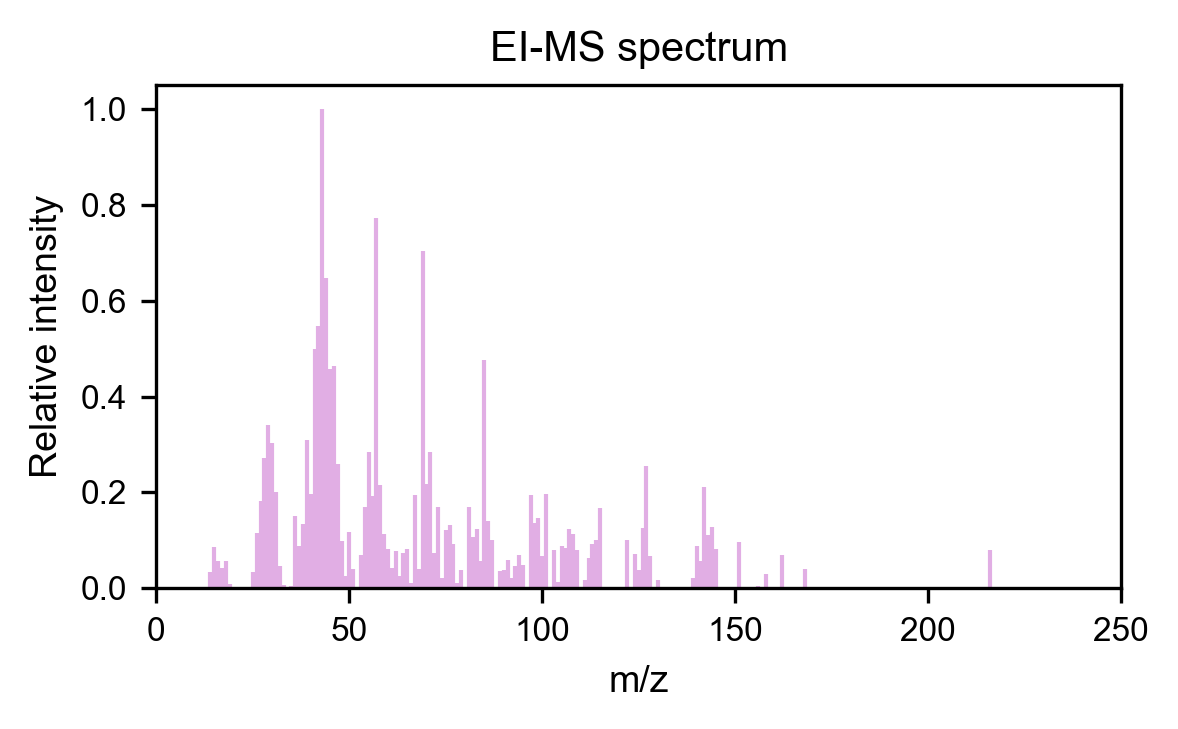

In [10]:
inten_scaled = inten / inten.max()

plt.figure(figsize=(10/2.5, 2.5),dpi=300)
plt.vlines(mz, 0, inten_scaled, color='#e1aee4', linewidth=1)
plt.xlabel('m/z')
plt.ylabel('Relative intensity')
plt.xlim([0,250])
plt.yticks(fontsize=fs-1)
plt.xticks(fontsize=fs-1)
plt.ylim([0,1.05])
plt.title(r'EI-MS spectrum', fontsize=fs+1)
plt.tight_layout()
plt.savefig(f'figs/{mol_name}_spec.png')
plt.show()

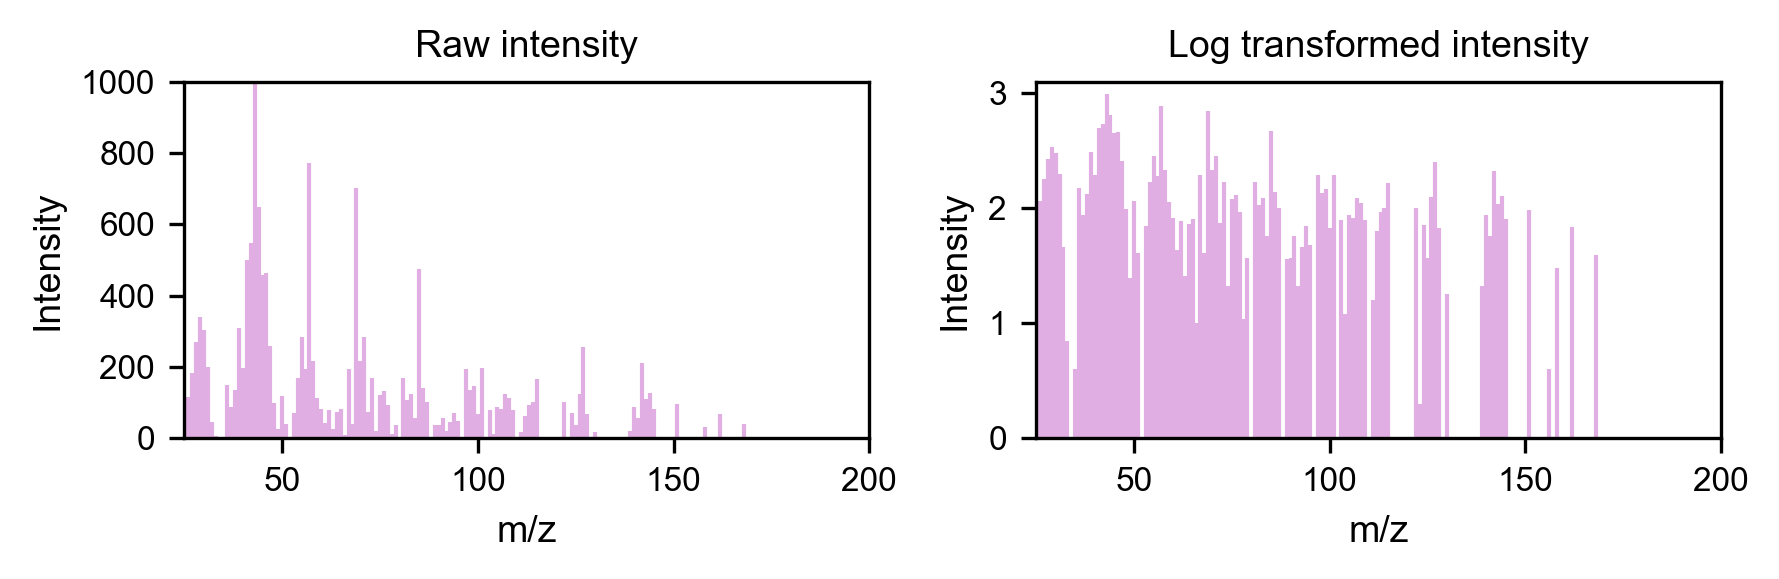

In [11]:
inten_log_scaled = inten_log / inten_log.max()
fig, axes = plt.subplots(1, 2, figsize=(6, 2), dpi=300, sharex=True)

# Linear spectrum
axes[0].vlines(mz, 0, inten, color='#e1aee4', linewidth=1)
axes[0].set_xlabel('m/z')
axes[0].set_ylabel('Intensity')
axes[0].set_xlim([25, 200])
axes[0].set_ylim([0, 1000])
axes[0].set_title(r'Raw intensity', fontsize=fs)

# Log spectrum
axes[1].vlines(mz, 0, inten_log, color='#e1aee4', linewidth=1)
axes[1].set_xlabel('m/z')
axes[1].set_ylabel('Intensity')
#axes[1].set_yscale('log')
axes[1].set_xlim([25, 200])
axes[1].set_ylim([0, 3.1])  # adjust min value to avoid log(0)
axes[1].set_title(r'Log transformed intensity', fontsize=fs)

# Global settings
for ax in axes:
    ax.tick_params(axis='x', labelsize=fs-1)
    ax.tick_params(axis='y', labelsize=fs-1)

#fig.suptitle(r'Gecko #119052 ($\mathrm{C}_{10}\mathrm{H}_{13}\mathrm{N}_3\mathrm{O}_{14}$)', fontsize=fs+1)
fig.tight_layout()

plt.savefig('figs/Gecko119052_spec_side_by_side.svg')
plt.show()

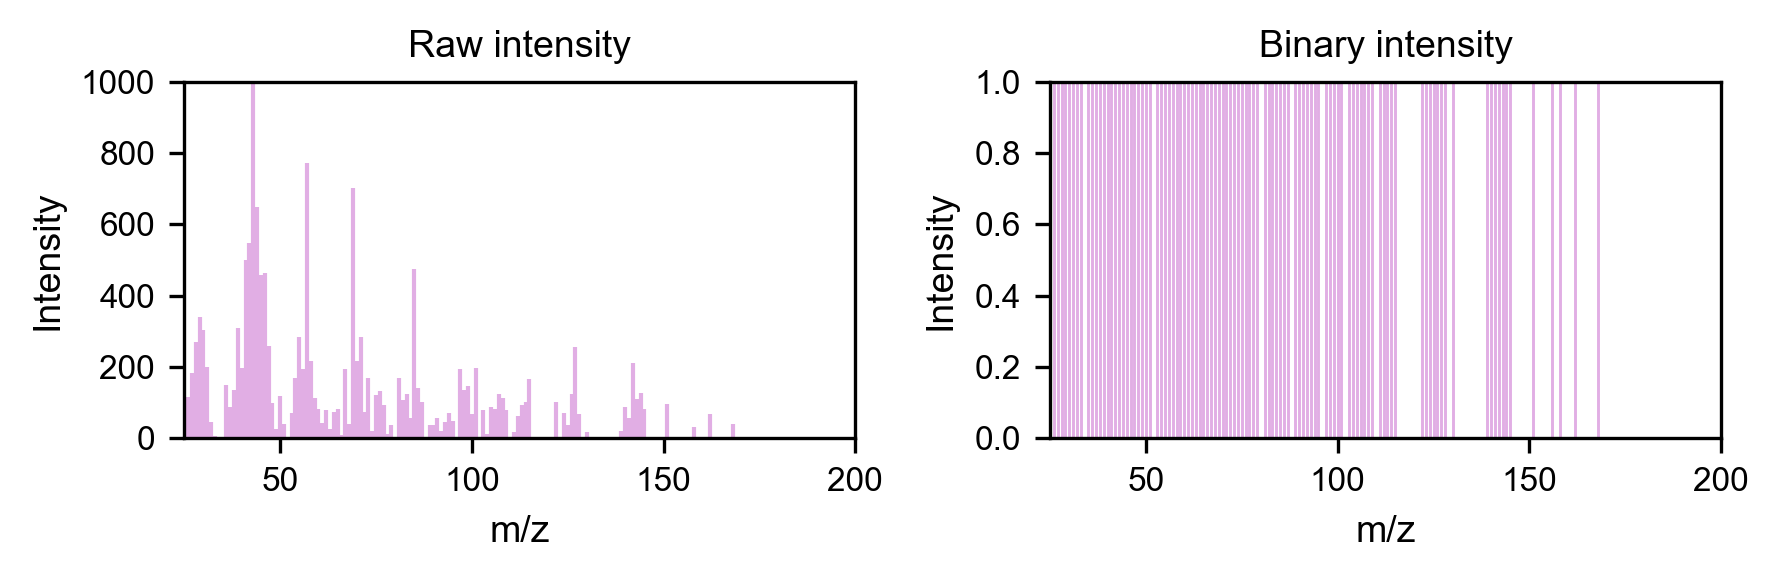

In [ ]:
inten_log_scaled = np.where(inten_log / inten_log.max() > 0, 1, 0)
fig, axes = plt.subplots(1, 2, figsize=(6, 2), dpi=300, sharex=True)

# Linear spectrum
axes[0].vlines(mz, 0, inten, color='#e1aee4', linewidth=1)
axes[0].set_xlabel('m/z')
axes[0].set_ylabel('Intensity')
axes[0].set_xlim([25, 200])
axes[0].set_ylim([0, 1000])
axes[0].set_title(r'Raw intensity', fontsize=fs)

# Log spectrum
axes[1].vlines(mz, 0, inten_log_scaled, color='#e1aee4', linewidth=0.7)
axes[1].set_xlabel('m/z')
axes[1].set_ylabel('Intensity')
#axes[1].set_yscale('log')
axes[1].set_xlim([25, 200])
axes[1].set_ylim([0, 1])  # adjust min value to avoid log(0)
axes[1].set_title(r'Binary intensity', fontsize=fs)

# Global settings
for ax in axes:
    ax.tick_params(axis='x', labelsize=fs-1)
    ax.tick_params(axis='y', labelsize=fs-1)

#fig.suptitle(r'Gecko #119052 ($\mathrm{C}_{10}\mathrm{H}_{13}\mathrm{N}_3\mathrm{O}_{14}$)', fontsize=fs+1)
fig.tight_layout()

plt.savefig('figs/Gecko119052_spec_side_by_side_binary.svg')
plt.show()

36


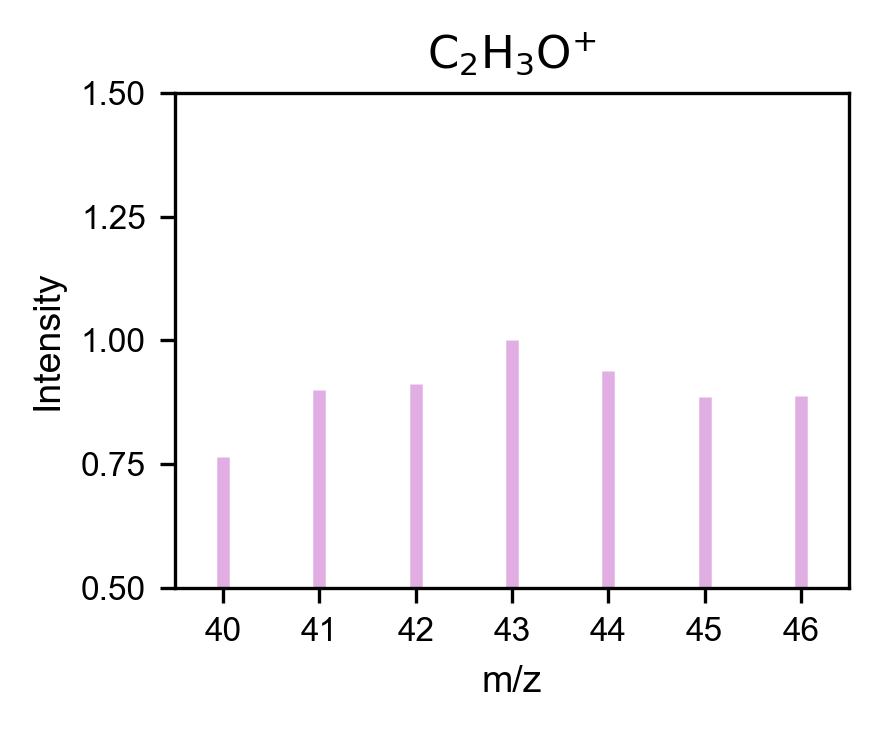

In [12]:
max_idx = np.argmax(inten)
idx = np.where(mz==57)[0][0]
print(idx)
spread = 2
#mz_zoom, inten_zoom = mz[idx-spread:idx+spread], inten_log_scaled[idx-spread:idx+spread]


plt.figure(figsize=(3, 2.5),dpi=300)
plt.vlines(mz, 0, inten_log_scaled, color='#e1aee4', linewidth=3)
plt.xlabel('m/z')
plt.ylabel('Intensity')
plt.xlim([39.5,46.5])
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5], fontsize=fs-1)
plt.xticks(np.linspace(40, 46, 7), fontsize=fs-1)
plt.ylim([0.5,1.5])
#plt.title(r'Gecko #119052 spectrum ($\mathrm{C}_{10}\mathrm{H}_{13}\mathrm{N}_3\mathrm{O}_{14}$)', fontsize=fs+1)
plt.title(r'$\mathrm{C}_{2} \mathrm{H}_{3} \mathrm{O}^{+}$')
plt.tight_layout()
plt.savefig(f'figs/Gecko119052_spec_zoom.png', dpi=600)
plt.show()

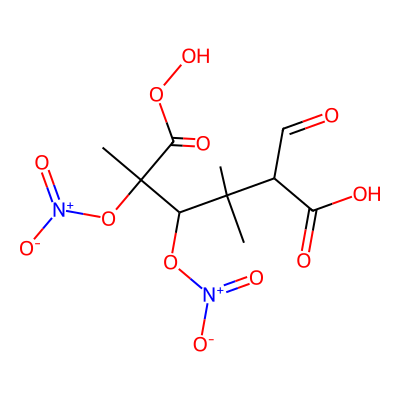

In [13]:
mol = Chem.MolFromSmiles(smiles)
img_large = Draw.MolToImage(mol, size=(400, 400))
img_large.save(f'figs/{mol_name}.png')
img_large

In [14]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.rdMolDescriptors import CalcMolFormula, CalcExactMolWt


# SMILES for acylium ion
frag_smiles = 'C[C+]=O'
frag_mol = Chem.AddHs(Chem.MolFromSmiles(frag_smiles))

# Print formula and exact mass
print(f'{CalcMolFormula(frag_mol)}: {CalcExactMolWt(frag_mol)}')

# Set atom labels manually
for atom in frag_mol.GetAtoms():
    symbol = atom.GetSymbol()
    charge = atom.GetFormalCharge()
    # Force H to show as H (optional, but all atoms are forced anyway)
    if symbol == 'H':
        atom.SetProp('atomLabel', 'H')
    else:
        # Add charge to other atoms if present
        if charge != 0:
            symbol += '+' if charge > 0 else '-'
        atom.SetProp('atomLabel', symbol)

# Draw molecule, forcing all labels
frag_img = Draw.MolToImage(frag_mol, size=(300, 300), kekulize=True, atomLabels=atom_labels, wedgeBonds=True)
frag_img.save('figs/frag_all_atoms_explicit.png')
frag_img

C2H3O+: 43.01784113609


NameError: name 'atom_labels' is not defined

C2H3O+: 43.01784113609


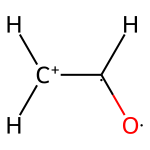

In [ ]:
frag_smiles = '[CH2+][CH][O]'
frag_mol = Chem.AddHs(Chem.MolFromSmiles(frag_smiles))
#frag_mol = Chem.AddHs(frag_mol, explicitOnly=True)
print(f'{CalcMolFormula(frag_mol)}: {CalcExactMolWt(frag_mol)}')
frag_img_large = Draw.MolToImage(frag_mol, size=(150, 150))
frag_img_large.save(f'figs/frag.png')
frag_img_large

C3H5O+: 57.03349120009


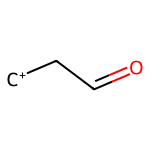

In [ ]:
frag_smiles = '[CH2+]CC=O'   
frag_mol = Chem.MolFromSmiles(frag_smiles)
#frag_mol = Chem.AddHs(frag_mol, explicitOnly=True)
print(f'{CalcMolFormula(frag_mol)}: {CalcExactMolWt(frag_mol)}')
frag_img_large = Draw.MolToImage(frag_mol, size=(150, 150))
frag_img_large.save(f'figs/frag_2.png')
frag_img_large

C3H5O+: 57.03349120009


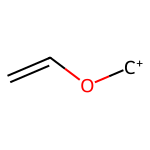

In [ ]:
frag_smiles = 'C=CO[CH2+]'   
frag_mol = Chem.MolFromSmiles(frag_smiles)
#frag_mol = Chem.AddHs(frag_mol, explicitOnly=True)
print(f'{CalcMolFormula(frag_mol)}: {CalcExactMolWt(frag_mol)}')
frag_img_large = Draw.MolToImage(frag_mol, size=(150, 150))
frag_img_large.save(f'figs/frag_3.png')
frag_img_large

C3H5O+2: 57.032942620179995


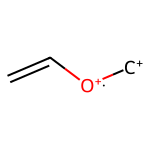

In [ ]:
frag_smiles = 'C=C[O+][CH2+]'   
frag_mol = Chem.MolFromSmiles(frag_smiles)
#frag_mol = Chem.AddHs(frag_mol, explicitOnly=True)
print(f'{CalcMolFormula(frag_mol)}: {CalcExactMolWt(frag_mol)}')
frag_img_large = Draw.MolToImage(frag_mol, size=(150, 150))
frag_img_large.save(f'figs/frag_4.png')
frag_img_large

133.037507704


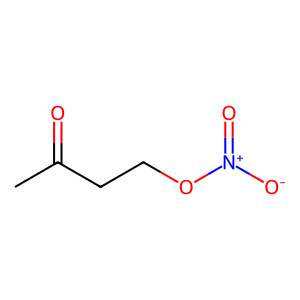

In [ ]:
frag_smiles = 'CC(=O)C(C(O[N+](=O)[O-]))'
frag_mol = Chem.MolFromSmiles(frag_smiles)
#frag_mol = Chem.AddHs(frag_mol, explicitOnly=True)
print(CalcExactMolWt(frag_mol))
frag_img_large = Draw.MolToImage(frag_mol, size=(300, 300))
frag_img_large

C10H13N3O14: 399.0397520959999


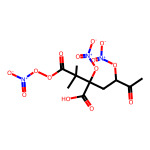

In [ ]:
frag_mol = Chem.MolFromSmiles(smiles)
#frag_mol = Chem.AddHs(frag_mol, explicitOnly=True)
print(f'{CalcMolFormula(frag_mol)}: {CalcExactMolWt(frag_mol)}')
frag_img_large = Draw.MolToImage(frag_mol, size=(150, 150))
frag_img_large